# Market Basket Data using Apriori Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("online_retail.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
df['InvoiceNo'].nunique()

25900

In [6]:
df['StockCode'].nunique()

4070

In [7]:
df['Description'].nunique()

4223

In [8]:
df['InvoiceNo']

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 541909, dtype: object

In [9]:
df['UnitPrice']

0         2.55
1         3.39
2         2.75
3         3.39
4         3.39
          ... 
541904    0.85
541905    2.10
541906    4.15
541907    4.15
541908    4.95
Name: UnitPrice, Length: 541909, dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [11]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
print(df.shape)
df['InvoiceNo'].value_counts()

(541909, 8)


573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: InvoiceNo, Length: 25900, dtype: int64

# Data Visualization
Data visualization is a field in data analysis that deals with visual representation of data. It graphically plots data and is an effective way to communicate inferences from data.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Description', ylabel='count'>

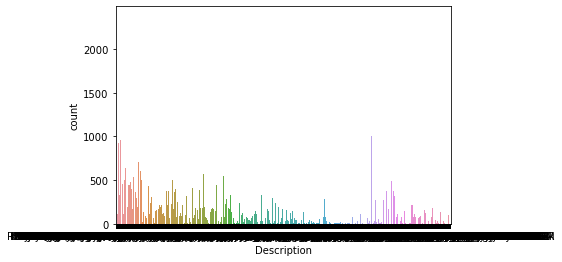

In [13]:
import seaborn as sns
sns.countplot('Description' , data = df)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CustomerID', ylabel='count'>

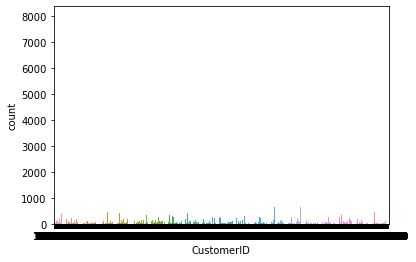

In [14]:
sns.countplot('CustomerID' , data = df)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StockCode', ylabel='count'>

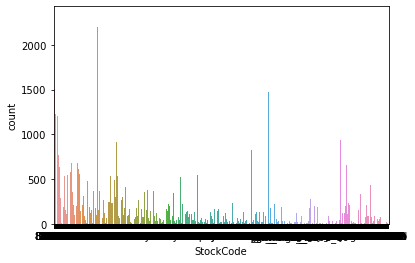

In [15]:
sns.countplot('StockCode' , data = df)

In [16]:
place_df = pd.DataFrame(df['Country'].value_counts())
place_df

,Country
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,2002
Portugal,1519
Australia,1259


In [17]:
payment_df = pd.DataFrame(df['Description'].value_counts())
payment_df

,Description
WHITE HANGING HEART T-LIGHT HOLDER,2369
REGENCY CAKESTAND 3 TIER,2200
JUMBO BAG RED RETROSPOT,2159
PARTY BUNTING,1727
LUNCH BAG RED RETROSPOT,1638
...,...
Missing,1
historic computer difference?....se,1
DUSTY PINK CHRISTMAS TREE 30CM,1
WRAP BLUE RUSSIAN FOLKART,1


<AxesSubplot:xlabel='CustomerID', ylabel='CustomerID'>

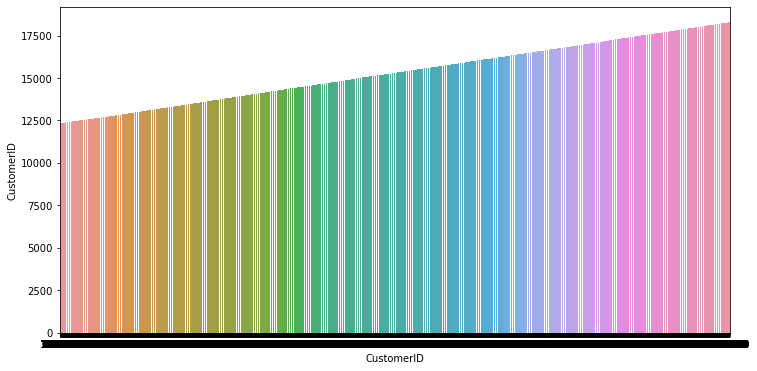

In [18]:
plt.figure(figsize= (12,6))
sns.barplot(x = df['CustomerID'], y = df['CustomerID'])

<AxesSubplot:>

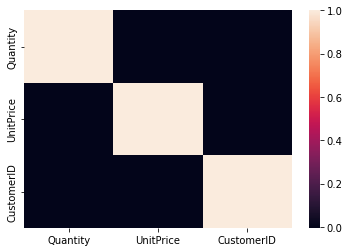

In [19]:
sns.heatmap(df.corr())

<Figure size 864x288 with 0 Axes>

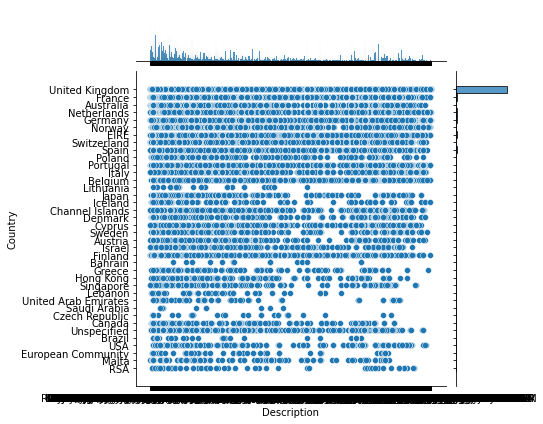

In [20]:
plt.figure(figsize = (12,4))
sns.jointplot(x='Description',y='Country',data=df,cmap="twilight")

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
df['CustomerID']=le.fit_transform(df['CustomerID'])

In [23]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,4048,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,4048,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,4048,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,4048,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,4048,United Kingdom


# Apriori Algorithm

Apriori is an algorithm for frequent item set mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. The frequent item sets determined by Apriori can be used to determine association rules which highlight general trends in the database.

# Loading Packages

In [24]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Loading data : We will use the encoding as latin1 to read this file as there are some special character in this file.

In [25]:
df = pd.read_csv("online_retail_Market_Basket.csv",encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [26]:
df.shape

(541909, 8)

In [27]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [28]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Data Cleaning
#First, some of the descriptions have spaces that need to be removed.
#We’ll also drop the rows that don’t have invoice numbers
#remove the credit transactions (those with invoice numbers containing C).

In [29]:
df['Description'] = df['Description'].str.strip() 
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str') 
df = df[~df['InvoiceNo'].str.contains('C')] 

In [30]:
df.shape

(532621, 8)

# Switzerland

In [31]:
basket = (df[df['Country'] =="Switzerland"]       
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 

In [32]:
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 RED ROSE PEG PLACE SETTINGS,15CM CHRISTMAS GLASS BALL 20 LIGHTS,...,WRAP MAGIC FOREST,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,YELLOW METAL CHICKEN HEART,YOU'RE CONFUSING ME METAL SIGN,ZINC METAL HEART DECORATION,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541569,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
542586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
basket.shape

(54, 987)

There are a lot of zeros in the data but we also need to make sure any positive values are converted to a 1 and anything less the 0 is set to 0.

In [34]:
#below function converts a values < 0 to 0 and value greater than equal 1 to 1.  
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

In [35]:
basket_sets.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 RED ROSE PEG PLACE SETTINGS,15CM CHRISTMAS GLASS BALL 20 LIGHTS,...,WRAP MAGIC FOREST,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,YELLOW METAL CHICKEN HEART,YOU'RE CONFUSING ME METAL SIGN,ZINC METAL HEART DECORATION,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541569,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
542586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


The final step is to generate the rules with their corresponding support, confidence and lift.

In [37]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN SPACEBOY),(5 HOOK HANGER RED MAGIC TOADSTOOL),0.333333,0.092593,0.074074,0.222222,2.400000,0.043210,1.166667
1,(5 HOOK HANGER RED MAGIC TOADSTOOL),(PLASTERS IN TIN SPACEBOY),0.092593,0.333333,0.074074,0.800000,2.400000,0.043210,3.333333
2,(PLASTERS IN TIN WOODLAND ANIMALS),(5 HOOK HANGER RED MAGIC TOADSTOOL),0.314815,0.092593,0.074074,0.235294,2.541176,0.044925,1.186610
3,(5 HOOK HANGER RED MAGIC TOADSTOOL),(PLASTERS IN TIN WOODLAND ANIMALS),0.092593,0.314815,0.074074,0.800000,2.541176,0.044925,3.425926
4,(6 RIBBONS RUSTIC CHARM),(ASSORTED COLOUR BIRD ORNAMENT),0.092593,0.092593,0.074074,0.800000,8.640000,0.065501,4.537037


In [38]:
rules[(rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(6 RIBBONS RUSTIC CHARM),(ASSORTED COLOUR BIRD ORNAMENT),0.092593,0.092593,0.074074,0.8,8.64,0.065501,4.537037
5,(ASSORTED COLOUR BIRD ORNAMENT),(6 RIBBONS RUSTIC CHARM),0.092593,0.092593,0.074074,0.8,8.64,0.065501,4.537037
6,(RIBBON REEL STRIPES DESIGN),(6 RIBBONS RUSTIC CHARM),0.074074,0.092593,0.074074,1.0,10.80,0.067215,inf
7,(6 RIBBONS RUSTIC CHARM),(RIBBON REEL STRIPES DESIGN),0.092593,0.074074,0.074074,0.8,10.80,0.067215,4.629630
12,(PAPER BUNTING RETROSPOT),(BLUE HAPPY BIRTHDAY BUNTING),0.092593,0.111111,0.074074,0.8,7.20,0.063786,4.444444
...,...,...,...,...,...,...,...,...,...
3187,"(SET/20 RED RETROSPOT PAPER NAPKINS, WATERING ...","(RED TOADSTOOL LED NIGHT LIGHT, WATERING CAN B...",0.074074,0.074074,0.074074,1.0,13.50,0.068587,inf
3189,"(SET/20 RED RETROSPOT PAPER NAPKINS, SPACEBOY ...","(RED TOADSTOOL LED NIGHT LIGHT, WATERING CAN B...",0.074074,0.092593,0.074074,1.0,10.80,0.067215,inf
3190,"(WATERING CAN BLUE ELEPHANT, SPACEBOY LUNCH BOX)","(RED TOADSTOOL LED NIGHT LIGHT, SET/20 RED RET...",0.074074,0.074074,0.074074,1.0,13.50,0.068587,inf
3191,"(SET/20 RED RETROSPOT PAPER NAPKINS, WATERING ...","(RED TOADSTOOL LED NIGHT LIGHT, SPACEBOY LUNCH...",0.074074,0.074074,0.074074,1.0,13.50,0.068587,inf


# Conclusion

In looking at the rules, it seems that the red paper cups, napkins and plates are purchased together in a manner that is higher than the overall probability would suggest.

# India

In [39]:
basket = (df[df['Country'] =="India"]       
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 

In [40]:
basket.head()

Description,12 COLOURED PARTY BALLOONS,20 DOLLY PEGS RETROSPOT,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,4 TRADITIONAL SPINNING TOPS,6 GIFT TAGS VINTAGE CHRISTMAS,60 CAKE CASES DOLLY GIRL DESIGN,A PRETTY THANK YOU CARD,AIRLINE BAG VINTAGE JET SET WHITE,ALARM CLOCK BAKELIKE CHOCOLATE,...,WOODLAND LARGE RED FELT HEART,WOODLAND MINI BACKPACK,WOODLAND SMALL BLUE FELT HEART,WOODLAND SMALL PINK FELT HEART,WOODLAND SMALL RED FELT HEART,WORLD WAR 2 GLIDERS ASSTD DESIGNS,WRAP VINTAGE DOILY,WRAP CHRISTMAS VILLAGE,YELLOW GIANT GARDEN THERMOMETER,ZINC METAL HEART DECORATION
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
578277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578541,0.0,5.0,0.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
578698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,12.0
578736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
579190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,0.0,0.0


In [41]:
basket.shape

(24, 416)

In [42]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

In [43]:
basket_sets = basket.applymap(encode_units)

In [44]:
basket_sets.head()

Description,12 COLOURED PARTY BALLOONS,20 DOLLY PEGS RETROSPOT,36 PENCILS TUBE RED RETROSPOT,36 PENCILS TUBE SKULLS,4 TRADITIONAL SPINNING TOPS,6 GIFT TAGS VINTAGE CHRISTMAS,60 CAKE CASES DOLLY GIRL DESIGN,A PRETTY THANK YOU CARD,AIRLINE BAG VINTAGE JET SET WHITE,ALARM CLOCK BAKELIKE CHOCOLATE,...,WOODLAND LARGE RED FELT HEART,WOODLAND MINI BACKPACK,WOODLAND SMALL BLUE FELT HEART,WOODLAND SMALL PINK FELT HEART,WOODLAND SMALL RED FELT HEART,WORLD WAR 2 GLIDERS ASSTD DESIGNS,WRAP VINTAGE DOILY,WRAP CHRISTMAS VILLAGE,YELLOW GIANT GARDEN THERMOMETER,ZINC METAL HEART DECORATION
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
578277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
578541,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
578698,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
578736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
579190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [46]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(4 TRADITIONAL SPINNING TOPS),(BLUE HARMONICA IN BOX),0.125000,0.208333,0.083333,0.666667,3.200000,0.057292,2.375000
1,(BLUE HARMONICA IN BOX),(4 TRADITIONAL SPINNING TOPS),0.208333,0.125000,0.083333,0.400000,3.200000,0.057292,1.458333
2,(RABBIT NIGHT LIGHT),(4 TRADITIONAL SPINNING TOPS),0.625000,0.125000,0.083333,0.133333,1.066667,0.005208,1.009615
3,(4 TRADITIONAL SPINNING TOPS),(RABBIT NIGHT LIGHT),0.125000,0.625000,0.083333,0.666667,1.066667,0.005208,1.125000
4,(4 TRADITIONAL SPINNING TOPS),(TRADITIONAL PICK UP STICKS GAME),0.125000,0.166667,0.083333,0.666667,4.000000,0.062500,2.500000


In [47]:
rules[(rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8)]      

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(WOODEN BOX OF DOMINOES),(4 TRADITIONAL SPINNING TOPS),0.083333,0.125000,0.083333,1.0,8.0,0.072917,inf
16,(LUNCH BOX WITH CUTLERY RETROSPOT),(ALARM CLOCK BAKELIKE GREEN),0.083333,0.125000,0.083333,1.0,8.0,0.072917,inf
21,(PACK OF 20 SPACEBOY NAPKINS),(ALARM CLOCK BAKELIKE GREEN),0.083333,0.125000,0.083333,1.0,8.0,0.072917,inf
30,(SPOTTY BUNTING),(ALARM CLOCK BAKELIKE GREEN),0.083333,0.125000,0.083333,1.0,8.0,0.072917,inf
36,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE IVORY),0.125000,0.125000,0.125000,1.0,8.0,0.109375,inf
...,...,...,...,...,...,...,...,...,...
101430,(WOODEN STAR CHRISTMAS SCANDINAVIAN),"(CARD CHRISTMAS VILLAGE, VINTAGE CHRISTMAS STO...",0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf
101431,(VINTAGE CHRISTMAS STOCKING),"(CARD CHRISTMAS VILLAGE, WOODEN STAR CHRISTMAS...",0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf
101433,(GINGHAM HEART DECORATION),"(CARD CHRISTMAS VILLAGE, WOODEN STAR CHRISTMAS...",0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf
101434,(CHRISTMAS RETROSPOT TREE WOOD),"(CARD CHRISTMAS VILLAGE, WOODEN STAR CHRISTMAS...",0.083333,0.083333,0.083333,1.0,12.0,0.076389,inf


# Conclusion

In looking at the rules, it seems that the Christmas retrospot,Chritmas decoration and Rabbiy night light,christmas retrospot tree  are purchased together in a manner that is higher than the overall probability would suggest.

# Netherlands	

In [48]:
basket = (df[df['Country'] =="Netherlands"]       
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 

In [49]:
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,16 PIECE CUTLERY SET PANTRY DESIGN,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,3 HEARTS HANGING DECORATION RUSTIC,3 HOOK HANGER MAGIC GARDEN,...,WRAP RED APPLES,WRAP WEDDING DAY,YELLOW METAL CHICKEN HEART,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,192.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,192.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
basket.shape

(95, 803)

In [51]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

In [52]:
basket_sets = basket.applymap(encode_units)

In [53]:
basket_sets.head()

Description,10 COLOUR SPACEBOY PEN,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,16 PIECE CUTLERY SET PANTRY DESIGN,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,3 HEARTS HANGING DECORATION RUSTIC,3 HOOK HANGER MAGIC GARDEN,...,WRAP RED APPLES,WRAP WEDDING DAY,YELLOW METAL CHICKEN HEART,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539491,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
539731,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
541206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541570,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [54]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [55]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(72 SWEETHEART FAIRY CAKE CASES),(DOLLY GIRL LUNCH BOX),0.105263,0.231579,0.094737,0.900000,3.886364,0.070360,7.684211
1,(DOLLY GIRL LUNCH BOX),(72 SWEETHEART FAIRY CAKE CASES),0.231579,0.105263,0.094737,0.409091,3.886364,0.070360,1.514170
2,(72 SWEETHEART FAIRY CAKE CASES),(ROUND SNACK BOXES SET OF 4 FRUITS),0.105263,0.178947,0.073684,0.700000,3.911765,0.054848,2.736842
3,(ROUND SNACK BOXES SET OF 4 FRUITS),(72 SWEETHEART FAIRY CAKE CASES),0.178947,0.105263,0.073684,0.411765,3.911765,0.054848,1.521053
4,(72 SWEETHEART FAIRY CAKE CASES),(ROUND SNACK BOXES SET OF4 WOODLAND),0.105263,0.263158,0.073684,0.700000,2.660000,0.045983,2.456140


In [56]:
rules[(rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8)]      

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
66,(COWBOYS AND INDIANS BIRTHDAY CARD),(LUNCH BAG RED RETROSPOT),0.105263,0.105263,0.084211,0.800000,7.600000,0.073130,4.473684
67,(LUNCH BAG RED RETROSPOT),(COWBOYS AND INDIANS BIRTHDAY CARD),0.105263,0.105263,0.084211,0.800000,7.600000,0.073130,4.473684
130,(FOOD CONTAINER SET 3 LOVE HEART),(STRAWBERRY LUNCH BOX WITH CUTLERY),0.094737,0.147368,0.084211,0.888889,6.031746,0.070249,7.673684
177,(LUNCH BAG RED RETROSPOT),(PLASTERS IN TIN SPACEBOY),0.105263,0.126316,0.084211,0.800000,6.333333,0.070914,4.368421
222,(LUNCH BOX WITH CUTLERY RETROSPOT),(STRAWBERRY LUNCH BOX WITH CUTLERY),0.105263,0.147368,0.094737,0.900000,6.107143,0.079224,8.526316
...,...,...,...,...,...,...,...,...,...
1796,"(DOLLY GIRL LUNCH BOX, PLASTERS IN TIN VINTAGE...","(ROUND SNACK BOXES SET OF4 WOODLAND, SPACEBOY ...",0.073684,0.094737,0.073684,1.000000,10.555556,0.066704,inf
1799,"(ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS ...","(DOLLY GIRL LUNCH BOX, SPACEBOY LUNCH BOX, RED...",0.084211,0.094737,0.073684,0.875000,9.236111,0.065706,7.242105
1801,"(PLASTERS IN TIN VINTAGE PAISLEY, SPACEBOY LUN...","(DOLLY GIRL LUNCH BOX, ROUND SNACK BOXES SET O...",0.084211,0.094737,0.073684,0.875000,9.236111,0.065706,7.242105
1815,"(DOLLY GIRL LUNCH BOX, ROUND SNACK BOXES SET O...","(ROUND SNACK BOXES SET OF 4 FRUITS, SPACEBOY L...",0.084211,0.126316,0.073684,0.875000,6.927083,0.063047,6.989474


# Australia

In [57]:
basket = (df[df['Country'] =="Australia"]       
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 


In [58]:
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,16 PIECE CUTLERY SET PANTRY DESIGN,20 DOLLY PEGS RETROSPOT,3 HOOK HANGER MAGIC GARDEN,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,...,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP I LOVE LONDON,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP VINTAGE LEAF DESIGN,WRAP WEDDING DAY,YELLOW GIANT GARDEN THERMOMETER
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537676,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
basket.shape

(57, 608)

In [60]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

In [61]:
basket_sets = basket.applymap(encode_units)

In [62]:
basket_sets.head()

Description,10 COLOUR SPACEBOY PEN,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,16 PIECE CUTLERY SET PANTRY DESIGN,20 DOLLY PEGS RETROSPOT,3 HOOK HANGER MAGIC GARDEN,3 STRIPEY MICE FELTCRAFT,3 TIER CAKE TIN GREEN AND CREAM,3 TIER CAKE TIN RED AND CREAM,...,WRAP DOILEY DESIGN,WRAP DOLLY GIRL,WRAP ENGLISH ROSE,WRAP I LOVE LONDON,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP VINTAGE LEAF DESIGN,WRAP WEDDING DAY,YELLOW GIANT GARDEN THERMOMETER
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537676,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540267,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [64]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(36 PENCILS TUBE RED RETROSPOT),(RED RETROSPOT CAKE STAND),0.070175,0.070175,0.070175,1.000000,14.250000,0.065251,inf
1,(RED RETROSPOT CAKE STAND),(36 PENCILS TUBE RED RETROSPOT),0.070175,0.070175,0.070175,1.000000,14.250000,0.065251,inf
2,(36 PENCILS TUBE RED RETROSPOT),(SET OF 3 CAKE TINS PANTRY DESIGN),0.070175,0.157895,0.070175,1.000000,6.333333,0.059095,inf
3,(SET OF 3 CAKE TINS PANTRY DESIGN),(36 PENCILS TUBE RED RETROSPOT),0.157895,0.070175,0.070175,0.444444,6.333333,0.059095,1.673684
4,(SET OF 6 SOLDIER SKITTLES),(4 TRADITIONAL SPINNING TOPS),0.122807,0.087719,0.070175,0.571429,6.514286,0.059403,2.128655


In [65]:
rules[(rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8)]      

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(36 PENCILS TUBE RED RETROSPOT),(RED RETROSPOT CAKE STAND),0.070175,0.070175,0.070175,1.0,14.250000,0.065251,inf
1,(RED RETROSPOT CAKE STAND),(36 PENCILS TUBE RED RETROSPOT),0.070175,0.070175,0.070175,1.0,14.250000,0.065251,inf
2,(36 PENCILS TUBE RED RETROSPOT),(SET OF 3 CAKE TINS PANTRY DESIGN),0.070175,0.157895,0.070175,1.0,6.333333,0.059095,inf
5,(4 TRADITIONAL SPINNING TOPS),(SET OF 6 SOLDIER SKITTLES),0.087719,0.122807,0.070175,0.8,6.514286,0.059403,4.385965
6,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.105263,0.105263,0.105263,1.0,9.500000,0.094183,inf
...,...,...,...,...,...,...,...,...,...
791,"(REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU...","(CIRCUS PARADE LUNCH BOX, DOLLY GIRL LUNCH BOX...",0.087719,0.070175,0.070175,0.8,11.400000,0.064020,4.649123
792,"(REGENCY CAKESTAND 3 TIER, SPACEBOY LUNCH BOX)","(ROSES REGENCY TEACUP AND SAUCER, CIRCUS PARAD...",0.087719,0.070175,0.070175,0.8,11.400000,0.064020,4.649123
793,"(ROSES REGENCY TEACUP AND SAUCER, SPACEBOY LUN...","(CIRCUS PARADE LUNCH BOX, DOLLY GIRL LUNCH BOX...",0.087719,0.070175,0.070175,0.8,11.400000,0.064020,4.649123
794,(CIRCUS PARADE LUNCH BOX),"(HOMEMADE JAM SCENTED CANDLES, DOLLY GIRL LUNC...",0.087719,0.070175,0.070175,0.8,11.400000,0.064020,4.649123


# Saudi Arabia

In [66]:
basket = (df[df['Country'] =="Saudi Arabia"]       
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 

In [67]:
basket.head()

Description,ASSORTED BOTTLE TOP MAGNETS,GLASS JAR DAISY FRESH COTTON WOOL,GLASS JAR MARMALADE,GLASS JAR PEACOCK BATH SALTS,GOLD EAR MUFF HEADPHONES,HOMEMADE JAM SCENTED CANDLES,PLASTERS IN TIN CIRCUS PARADE,PLASTERS IN TIN SKULLS,PLASTERS IN TIN STRONGMAN
InvoiceNo,,,,,,,,,
544838,12,6,6,6,2,12,12,12,12


In [68]:
basket.shape

(1, 9)

In [69]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [70]:
basket_sets = basket.applymap(encode_units)

In [71]:
basket_sets.head()

Description,ASSORTED BOTTLE TOP MAGNETS,GLASS JAR DAISY FRESH COTTON WOOL,GLASS JAR MARMALADE,GLASS JAR PEACOCK BATH SALTS,GOLD EAR MUFF HEADPHONES,HOMEMADE JAM SCENTED CANDLES,PLASTERS IN TIN CIRCUS PARADE,PLASTERS IN TIN SKULLS,PLASTERS IN TIN STRONGMAN
InvoiceNo,,,,,,,,,
544838,1,1,1,1,1,1,1,1,1


In [72]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [73]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(GLASS JAR DAISY FRESH COTTON WOOL),(ASSORTED BOTTLE TOP MAGNETS),1.0,1.0,1.0,1.0,1.0,0.0,inf
1,(ASSORTED BOTTLE TOP MAGNETS),(GLASS JAR DAISY FRESH COTTON WOOL),1.0,1.0,1.0,1.0,1.0,0.0,inf
2,(ASSORTED BOTTLE TOP MAGNETS),(GLASS JAR MARMALADE),1.0,1.0,1.0,1.0,1.0,0.0,inf
3,(GLASS JAR MARMALADE),(ASSORTED BOTTLE TOP MAGNETS),1.0,1.0,1.0,1.0,1.0,0.0,inf
4,(GLASS JAR PEACOCK BATH SALTS),(ASSORTED BOTTLE TOP MAGNETS),1.0,1.0,1.0,1.0,1.0,0.0,inf


In [74]:
rules[(rules['lift'] >= 1) &
       (rules['confidence'] >= 1.0)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(GLASS JAR DAISY FRESH COTTON WOOL),(ASSORTED BOTTLE TOP MAGNETS),1.0,1.0,1.0,1.0,1.0,0.0,inf
1,(ASSORTED BOTTLE TOP MAGNETS),(GLASS JAR DAISY FRESH COTTON WOOL),1.0,1.0,1.0,1.0,1.0,0.0,inf
2,(ASSORTED BOTTLE TOP MAGNETS),(GLASS JAR MARMALADE),1.0,1.0,1.0,1.0,1.0,0.0,inf
3,(GLASS JAR MARMALADE),(ASSORTED BOTTLE TOP MAGNETS),1.0,1.0,1.0,1.0,1.0,0.0,inf
4,(GLASS JAR PEACOCK BATH SALTS),(ASSORTED BOTTLE TOP MAGNETS),1.0,1.0,1.0,1.0,1.0,0.0,inf
...,...,...,...,...,...,...,...,...,...
18655,(GLASS JAR DAISY FRESH COTTON WOOL),"(GLASS JAR PEACOCK BATH SALTS, PLASTERS IN TIN...",1.0,1.0,1.0,1.0,1.0,0.0,inf
18656,(PLASTERS IN TIN CIRCUS PARADE),"(GLASS JAR PEACOCK BATH SALTS, PLASTERS IN TIN...",1.0,1.0,1.0,1.0,1.0,0.0,inf
18657,(ASSORTED BOTTLE TOP MAGNETS),"(GLASS JAR PEACOCK BATH SALTS, PLASTERS IN TIN...",1.0,1.0,1.0,1.0,1.0,0.0,inf
18658,(GLASS JAR MARMALADE),"(GLASS JAR PEACOCK BATH SALTS, PLASTERS IN TIN...",1.0,1.0,1.0,1.0,1.0,0.0,inf


# 	Portugal

In [105]:
basket = (df[df['Country'] =="Portugal"]       
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo')) 


In [106]:
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,20 DOLLY PEGS RETROSPOT,3 PIECE SPACEBOY COOKIE CUTTER SET,3 STRIPEY MICE FELTCRAFT,36 FOIL HEART CAKE CASES,...,WRAP FLOWER SHOP,WRAP GINGHAM ROSE,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,YOU'RE CONFUSING ME METAL SIGN,ZINC FOLKART SLEIGH BELLS,ZINC WIRE KITCHEN ORGANISER
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
basket.shape

(58, 713)

In [108]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1


In [109]:
basket_sets = basket.applymap(encode_units)

In [110]:
basket_sets.head()


Description,10 COLOUR SPACEBOY PEN,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,20 DOLLY PEGS RETROSPOT,3 PIECE SPACEBOY COOKIE CUTTER SET,3 STRIPEY MICE FELTCRAFT,36 FOIL HEART CAKE CASES,...,WRAP FLOWER SHOP,WRAP GINGHAM ROSE,WRAP PAISLEY PARK,WRAP PINK FAIRY CAKES,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,YOU'RE CONFUSING ME METAL SIGN,ZINC FOLKART SLEIGH BELLS,ZINC WIRE KITCHEN ORGANISER
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537246,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
537818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [112]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(4 TRADITIONAL SPINNING TOPS),(CHARLOTTE BAG SUKI DESIGN),0.120690,0.172414,0.086207,0.714286,4.142857,0.065398,2.896552
1,(CHARLOTTE BAG SUKI DESIGN),(4 TRADITIONAL SPINNING TOPS),0.172414,0.120690,0.086207,0.500000,4.142857,0.065398,1.758621
2,(4 TRADITIONAL SPINNING TOPS),(RETROSPOT TEA SET CERAMIC 11 PC),0.120690,0.241379,0.086207,0.714286,2.959184,0.057075,2.655172
3,(RETROSPOT TEA SET CERAMIC 11 PC),(4 TRADITIONAL SPINNING TOPS),0.241379,0.120690,0.086207,0.357143,2.959184,0.057075,1.367816
4,(BAKING SET 9 PIECE RETROSPOT),(POSTAGE),0.206897,0.517241,0.137931,0.666667,1.288889,0.030916,1.448276


In [113]:
rules[(rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
98,(LUNCH BAG SPACEBOY DESIGN),(LUNCH BAG PINK POLKADOT),0.086207,0.137931,0.086207,1.000000,7.250000,0.074316,inf
118,(SCANDINAVIAN PAISLEY PICNIC BAG),(PINK VINTAGE PAISLEY PICNIC BAG),0.120690,0.137931,0.120690,1.000000,7.250000,0.104043,inf
119,(PINK VINTAGE PAISLEY PICNIC BAG),(SCANDINAVIAN PAISLEY PICNIC BAG),0.137931,0.120690,0.120690,0.875000,7.250000,0.104043,7.034483
125,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.120690,0.137931,0.103448,0.857143,6.214286,0.086801,6.034483
128,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.120690,0.137931,0.103448,0.857143,6.214286,0.086801,6.034483
...,...,...,...,...,...,...,...,...,...
1517,"(LUNCH BAG CARS BLUE, LUNCH BAG PINK POLKADOT)","(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...",0.103448,0.103448,0.086207,0.833333,8.055556,0.075505,5.379310
1519,"(LUNCH BAG CARS BLUE, JUMBO BAG SCANDINAVIAN B...","(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...",0.103448,0.086207,0.086207,0.833333,9.666667,0.077289,5.482759
1520,"(JUMBO SHOPPER VINTAGE RED PAISLEY, LUNCH BAG ...","(LUNCH BAG CARS BLUE, JUMBO BAG PINK VINTAGE P...",0.103448,0.086207,0.086207,0.833333,9.666667,0.077289,5.482759
1523,"(JUMBO BAG PINK VINTAGE PAISLEY, LUNCH BAG PIN...","(LUNCH BAG CARS BLUE, JUMBO SHOPPER VINTAGE RE...",0.103448,0.086207,0.086207,0.833333,9.666667,0.077289,5.482759
